#Cargar liberias, leer archivos, verificar columnas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import missingno as msno
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/7 Semestre/house-prices-advanced-regression-techniques/train.csv')
#test = pd.read_csv('/content/drive/MyDrive/7 Semestre/house-prices-advanced-regression-techniques/test.csv')
#train = pd.read_csv('/content/drive/MyDrive/Semestre 7/Víctor/train.csv')
#labels = pd.read_csv('/content/drive/MyDrive/7 Semestre/house-prices-advanced-regression-techniques/sample_submission.csv')

In [ ]:
train = train.drop('Id',axis=1)
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
#train.columns

In [ ]:
#train.select_dtypes('number').info()

In [ ]:
num = train.select_dtypes(include=['number'])
categ = train.select_dtypes(include=['object'])
numeric_cols = train.select_dtypes(include=['number']).columns
categ_cols = train.select_dtypes(include=['object']).columns

#Exploración de los datos

##Caracterización de las variables numericas

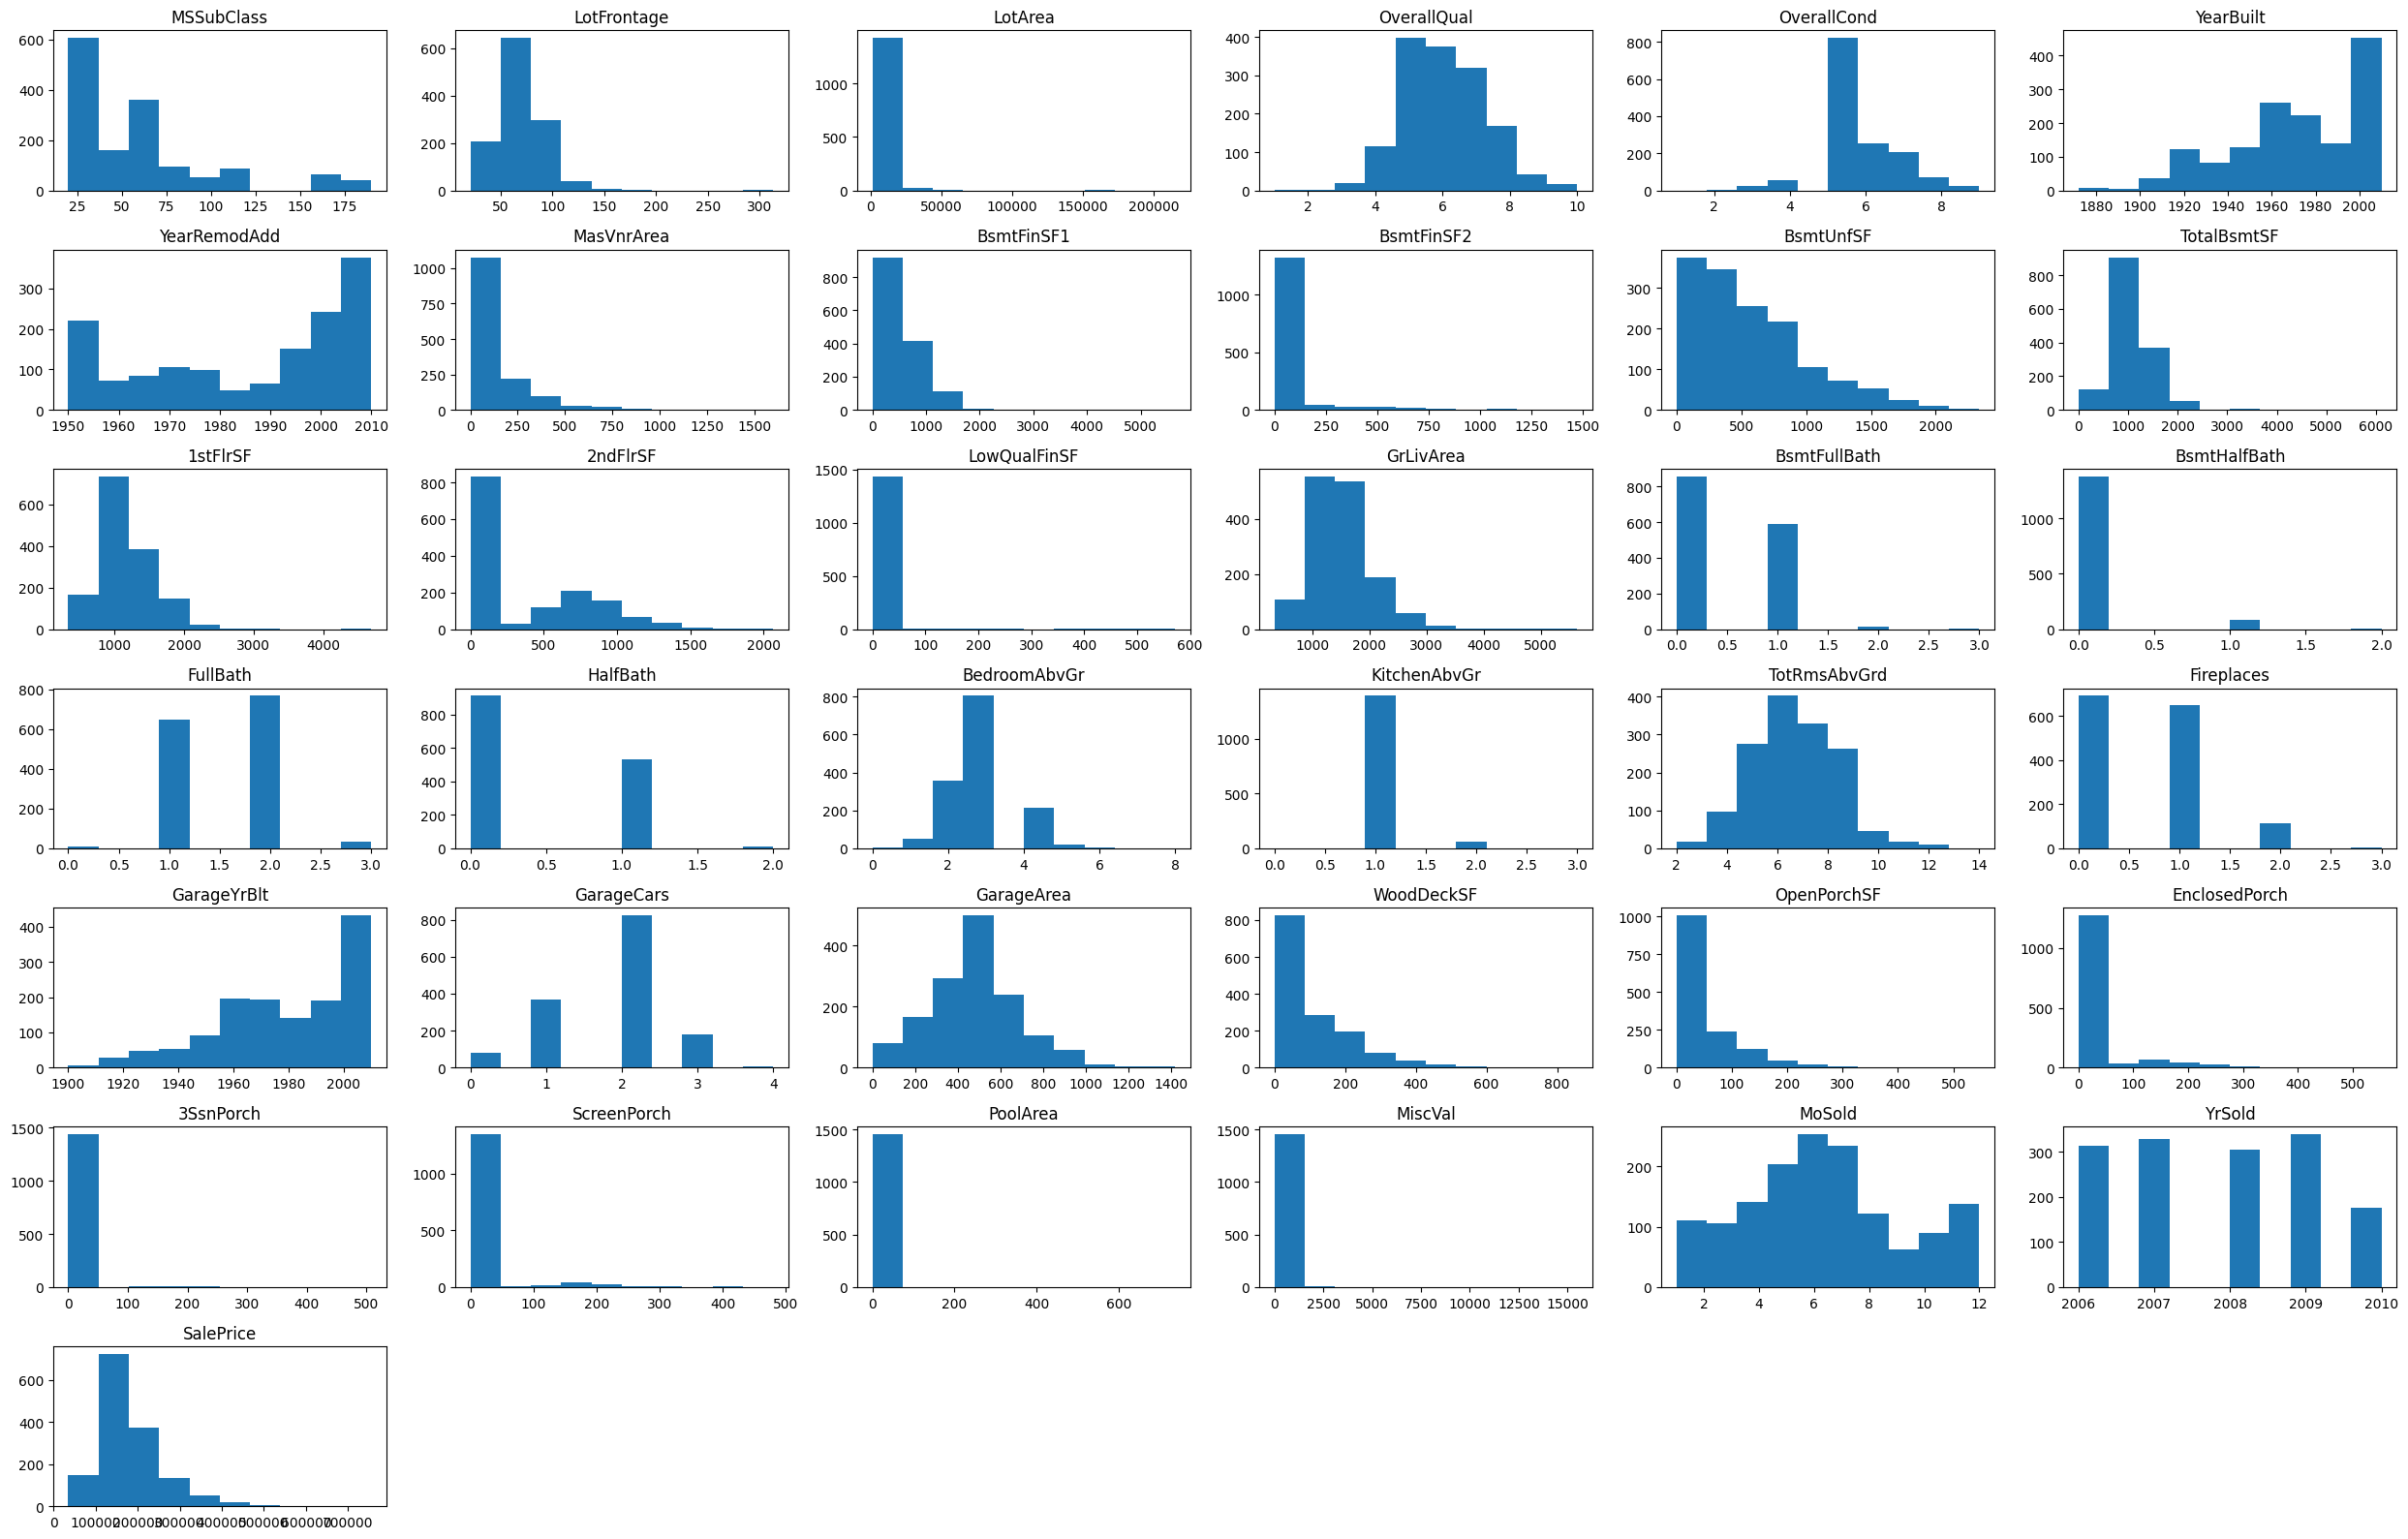

In [ ]:
#Distribución de las variables numéricas
num.hist(bins=10, figsize=(25,16),grid=False)
plt.tight_layout()
plt.show()

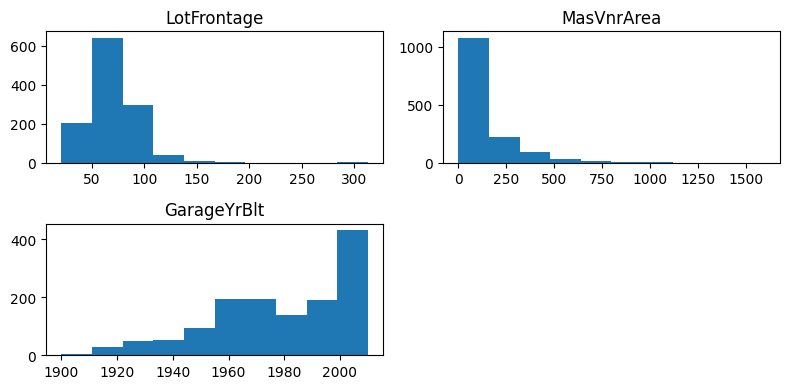

In [ ]:
#Columnas numéricas con valores faltantes
num_nulls =num.columns[num.isnull().sum() > 0]
num[num_nulls].hist(bins=10, figsize=(8,4),grid=False)
plt.tight_layout()
plt.show()
#LotFrontage y MasVnrArea NaNs se pueden poner en 0
#GarageYrBlt se podrían borrar solo son 5.5%, o pasar a 0.

Correlación de los datos numéricos con el precio de venta

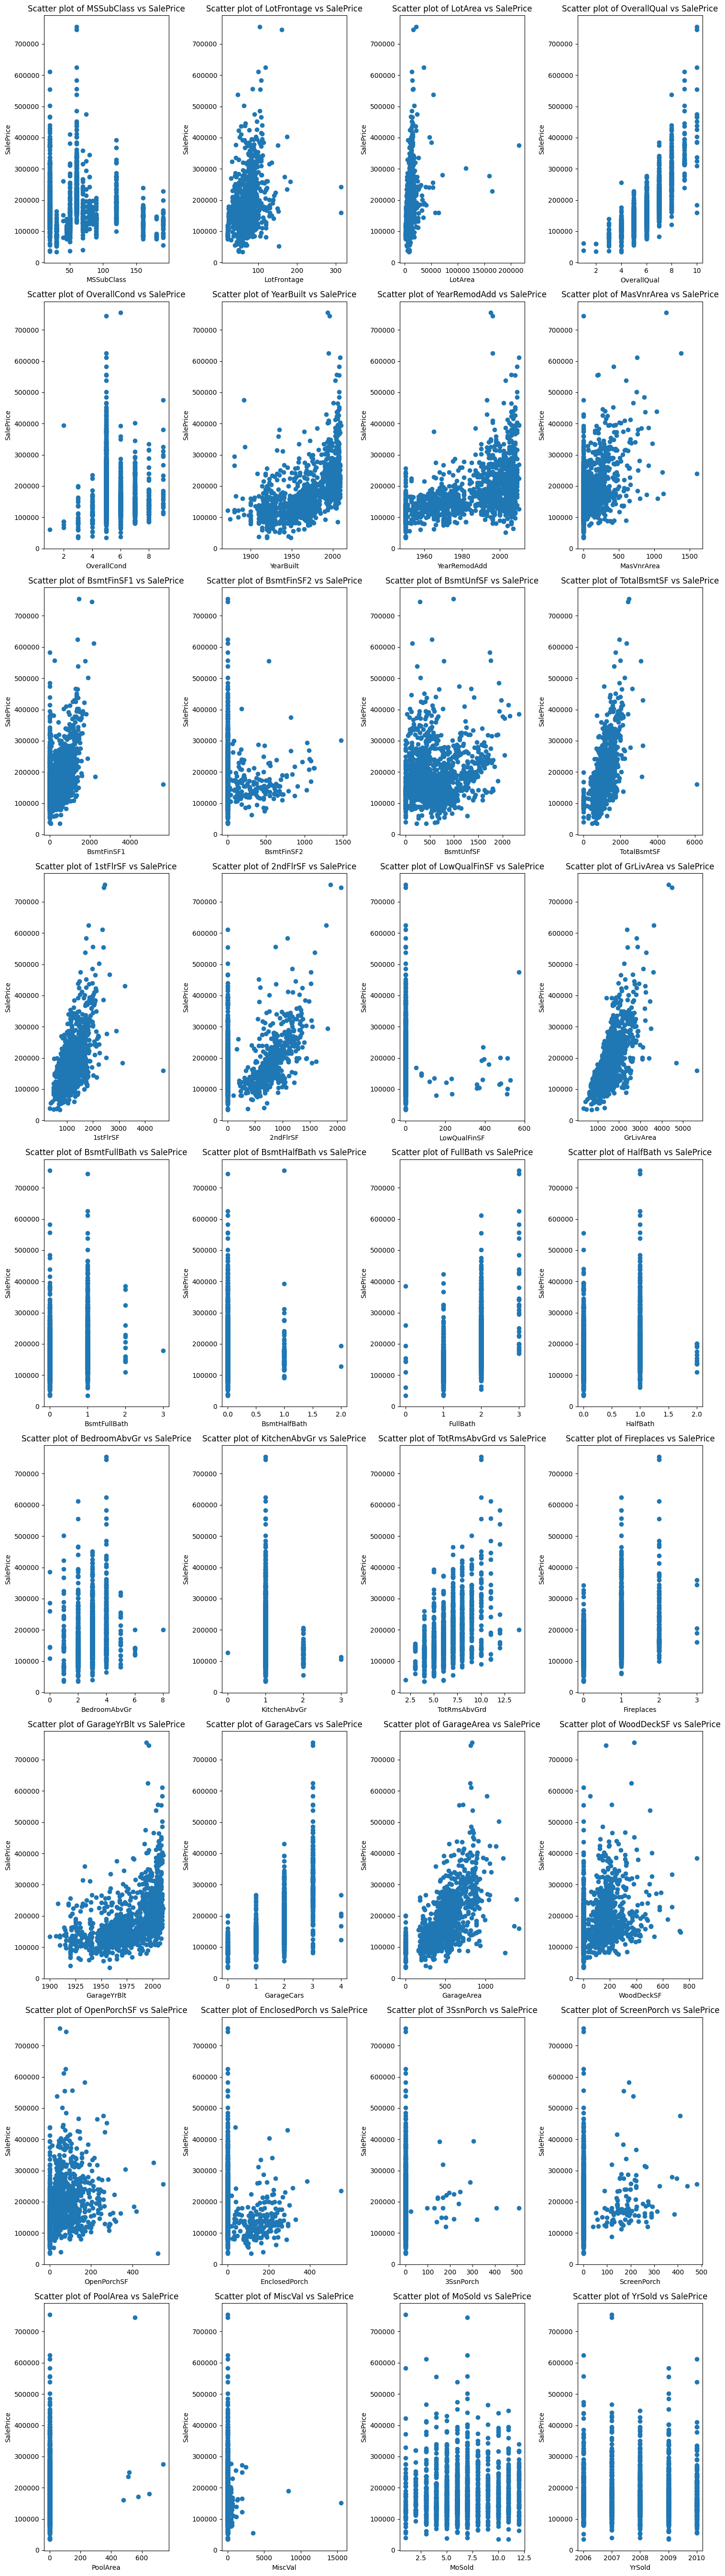

In [ ]:
num_cols = [col for col in num.columns if col != 'SalePrice']
# Determina el número de filas y columnas para los subplots
num_plots = len(num_cols)
num_cols_plot = 4
num_rows = (num_plots + num_cols_plot - 1) // num_cols_plot
# Crea un conjunto de subplots
fig, axes = plt.subplots(num_rows, num_cols_plot, figsize=(15, 6*num_rows))
# Aplanamos el arreglo de subplots para facilitar el acceso
axes = axes.flatten()
# Itera sobre las columnas numéricas y genera scatter plots en los subplots
for i, col in enumerate(num_cols):
    ax = axes[i]
    ax.scatter(num[col], num['SalePrice'])
    ax.set_title(f'Scatter plot of {col} vs SalePrice')
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')
# Ajusta el espacio entre subplots
plt.tight_layout()
# Muestra los subplots
plt.show()

Matriz de correlación TOP 5 y BOTTOM 5

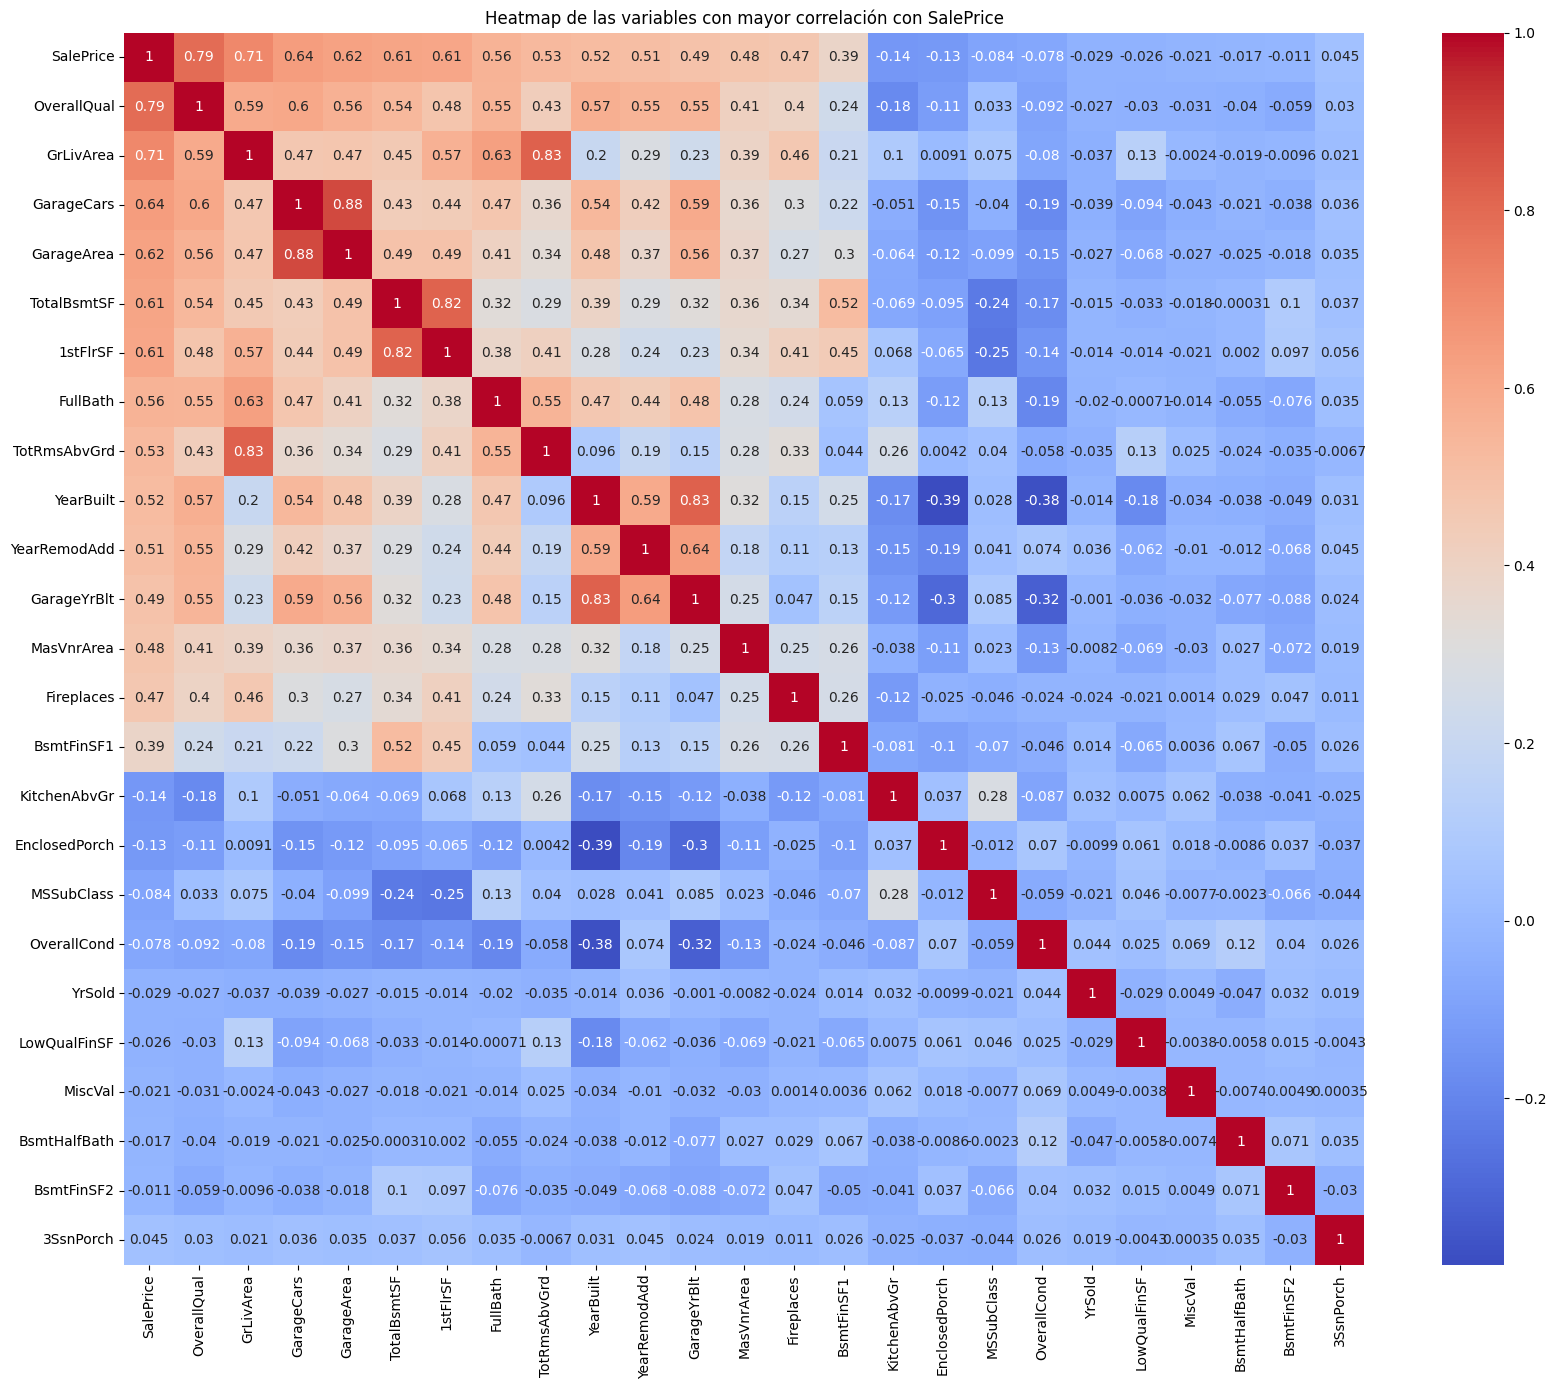

In [ ]:
correlation_matrix = num.corr()

top_positive_corr = correlation_matrix['SalePrice'].sort_values(ascending=False).head(15).index
top_negative_corr = correlation_matrix['SalePrice'].sort_values(ascending=True).head(10).index
selected_columns = list(top_positive_corr) + list(top_negative_corr)
selected_data = num[selected_columns]
selected_corr_matrix = selected_data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de las variables con mayor correlación con SalePrice')
plt.show()


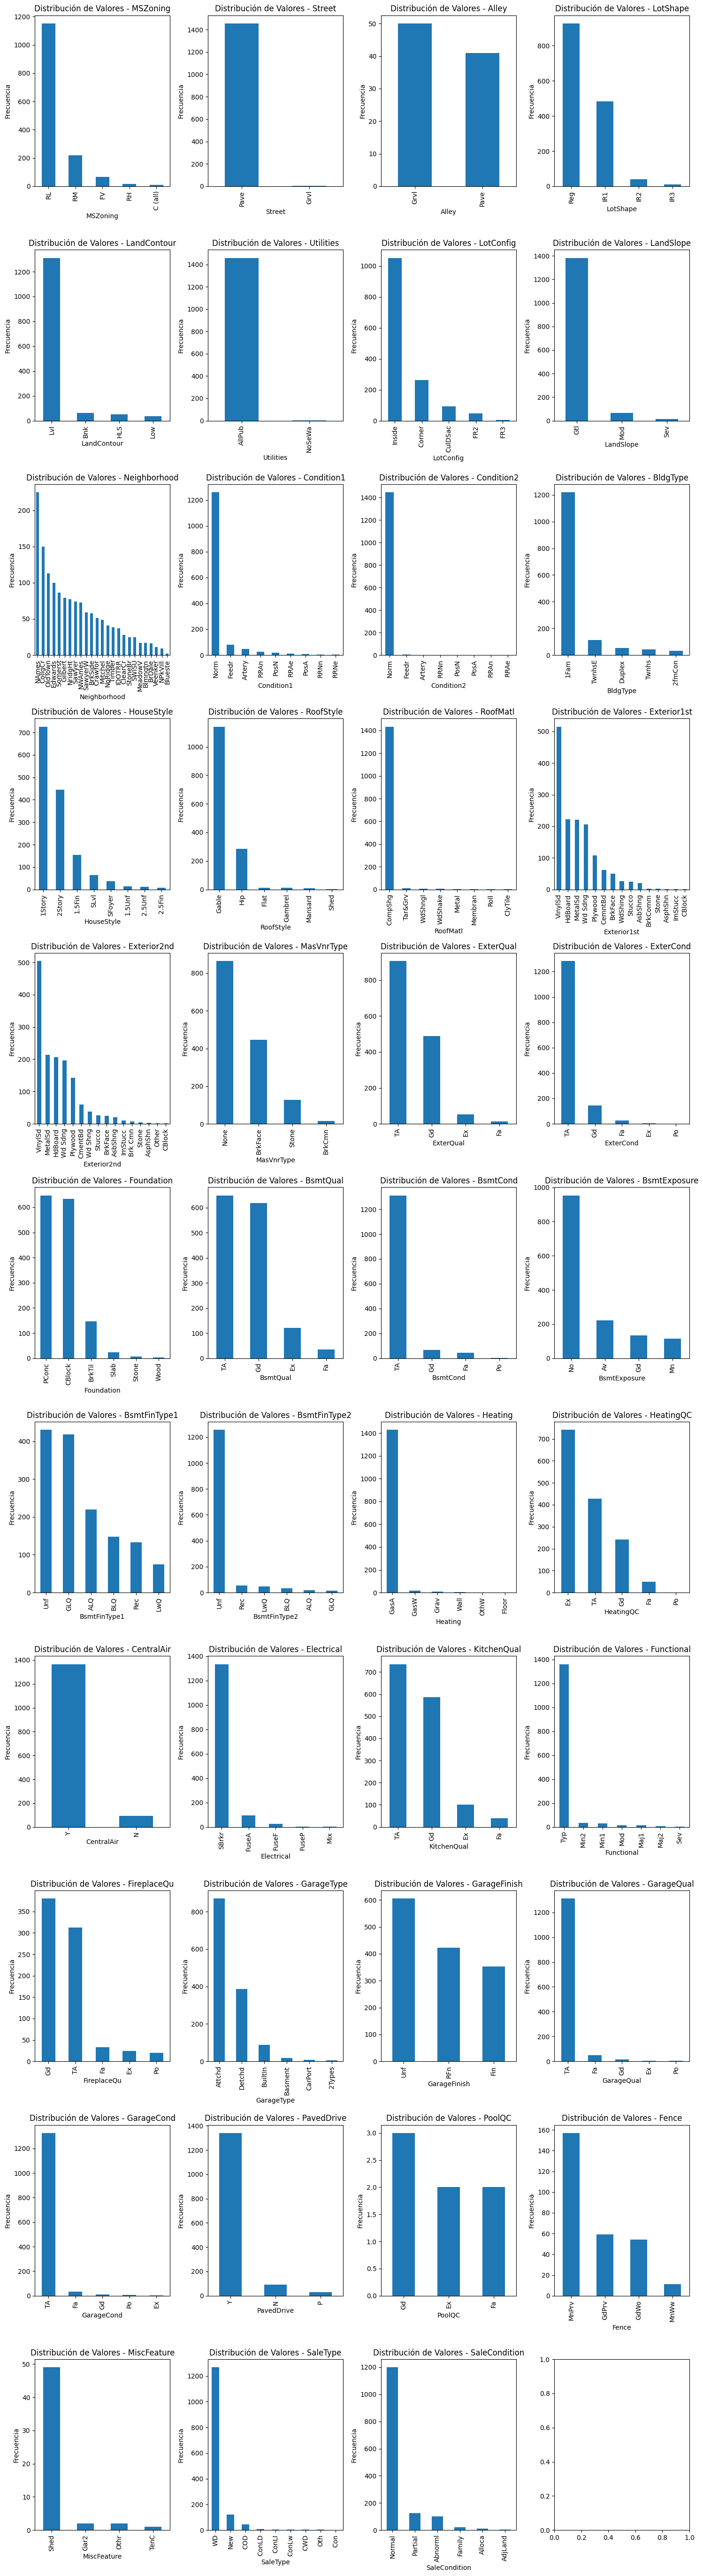

In [ ]:
num_plots = len(categ.columns)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for i, column in enumerate(categ.columns):
    ax = axes[i]
    train[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de Valores - {column}')
plt.tight_layout()
plt.show()

In [ ]:
#categ['GarageYrBlt'].value_counts()

##Eliminación de valores faltantes

In [ ]:
categ_null=categ.isnull().sum().sort_values(ascending=False)
categ[categ_null[categ_null > 0].index].isnull().sum().sort_values(ascending=False)
categ_null = categ_null[categ_null >0]
#Todas las columnas categoricas con valores faltantes los pueden reemplazar con 'None', indican que no tienen no estan incompletos los datos

In [ ]:
train[['LotFrontage','MasVnrArea']] = train[['LotFrontage','MasVnrArea']].fillna(0)
train.dropna(subset=['GarageYrBlt'],inplace=True)
##GarageYrBlt se podrían borrar solo son 5.5%, o pasar a 0.
train[categ_null.index] = train[categ_null.index].fillna('None')

#Guardar df sin preprocesamiento y creación de json

In [ ]:
train_clean = train #Backup del df ya limpio pero sin procesar

In [ ]:
json_train= train_clean.to_json(orient='records',indent=5)
with open('houses.json', 'w') as json_file:
    json_file.write(json_train)

In [ ]:
import json
casas_dict = train_clean.to_dict(orient='records')
casas_json = json.dumps({"casas": casas_dict}, indent=4)
with open('casas.json', 'w') as archivo:
    archivo.write(casas_json)

#Preprocesamiento de datos

##Creación de dummy variables

In [ ]:
dummies = pd.get_dummies(train[categ.columns])
# Combina las dummy variables con el DataFrame original
train = pd.concat([train, dummies], axis=1)
# Elimina la columna original
train = train.drop(categ.columns, axis=1)

In [ ]:
train.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFini

In [ ]:
train.shape

(1379, 298)

In [ ]:
num.shape[1] + categ.shape[1]

80

In [ ]:
train.corr().sort_values(by='SalePrice',ascending=False)['SalePrice'].head(15)

SalePrice           1.000000
OverallQual         0.787228
GrLivArea           0.708172
GarageCars          0.637095
GarageArea          0.608405
TotalBsmtSF         0.603583
1stFlrSF            0.594935
FullBath            0.556550
BsmtQual_Ex         0.555772
TotRmsAbvGrd        0.538309
KitchenQual_Ex      0.513985
YearBuilt           0.507584
YearRemodAdd        0.505434
Foundation_PConc    0.491391
GarageYrBlt         0.486362
Name: SalePrice, dtype: float64

#Modelos

In [ ]:
train_clean.columns[train_clean.isnull().sum()>0]

Index([], dtype='object')

In [ ]:
X = train_clean.drop('SalePrice',axis=1)
y = train_clean['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
all(y == train_clean['SalePrice'])

True

In [ ]:
#PREPROCESAMIENTO
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#Escalamiento para las variables numericas
#Dummies para las variables categoricas
preprocessing = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numeric_cols[:-1]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categ_cols)
    ])

In [ ]:
from sklearn.pipeline import Pipeline
'''
from sklearn.linear_model import LinearRegression
modelo = LinearRegression() #0.05
'''
#from sklearn.linear_model import Ridge
#modelo = Ridge(random_state=6) #0.02

#from sklearn.svm import SVR
#modelo = SVR() #0.14

#from sklearn.ensemble import GradientBoostingRegressor
#modelo = GradientBoostingRegressor() #0.018

from sklearn.tree import DecisionTreeClassifier
#modelo = DecisionTreeClassifier(criterion='entropy',max_depth=100,max_leaf_nodes=1500,random_state=6) #.072 o 0.85 con log

from sklearn.linear_model import LinearRegression
#modelo = LinearRegression() #0.05,0.053 con log
pipeline = Pipeline(steps=[('preprocessor', preprocessing),
                           ('model', modelo)])



In [ ]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)

ValueError: ignored

In [ ]:
#Evaluar modelo
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(np.log(y_train), np.log(y_pred)))

In [ ]:
temp=train_clean.nunique()>25
temp=temp.replace([True,False],[1,0])

In [ ]:
continuas=train_clean[temp[temp==1].index].columns

In [ ]:
train_clean[continuas]=np.log(train_clean[continuas])

In [ ]:
train_clean.head()

In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(pipeline,'pipeline_houses.joblib')

In [ ]:
X_train.shape

In [ ]:
modelo = joblib.load('/content/pipeline_houses.joblib')
modelo.predict(X_test)

In [ ]:
X_test.columns

#Test

In [ ]:
pipeline.feature_names_in_

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/7 Semestre/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
X.columns

In [ ]:
[col for col in test.columns if col not in pipeline.feature_names_in_]

In [ ]:
X_ = test.drop(['Id'],axis=1)
y_ = test['Id']

In [ ]:
media = X_[['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold']].mean()
X_[['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold']].fillna(media)
X_.fillna(0,inplace=True)

In [ ]:
results = pipeline.predict(X_)

In [ ]:
y_['SalePrice'] = results

In [ ]:
csv =pd.DataFrame({'Id':test['Id'], 'SalePrice': results})

In [ ]:
csv.to_csv('prediction2.csv',index=False)

In [ ]:
csv.head()

In [ ]:
train_clean.to_csv('train_clean.csv')

In [ ]:
train.describe()